# Aquire dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emnist

import torch 
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [2]:
def get_data():
    X, Y = emnist.extract_training_samples('letters')
    X_test, Y_test = emnist.extract_test_samples('letters')

    return X, Y- 1, X_test, Y_test - 1

In [3]:
X, m_Y, X_test, m_Y_test = get_data()

In [4]:
X.shape

(124800, 28, 28)

In [5]:
X = torch.tensor(np.array(X), dtype=torch.float)
X_test = torch.tensor(np.array(X_test), dtype=torch.float)

In [6]:
m = X.shape[0]

In [7]:
m

124800

In [8]:
Y = torch.zeros(m,26, dtype = torch.float)
Y_test = torch.zeros(X_test.shape[0],26, dtype = torch.long)
for i in range(0,m):
    Y[i, m_Y[i]] = 1
for i in range(0,X_test.shape[0]):
    Y_test[i, m_Y_test[i]] = 1

In [9]:
train_dataset = TensorDataset(X, Y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [10]:
def show_img(i):
    plt.imshow(i)

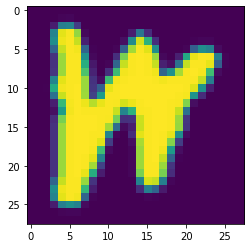

In [11]:
show_img(X[0])

In [26]:
#settings 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 0.01
batch_size = 10
epochs = 6

In [44]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5,padding=2)
        self.pool = nn.AvgPool2d((2,2),stride=(2,2))
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,26)
    
    def forward(self, x):
        x = self.pool((self.conv1(x)))
        x = torch.tanh(x)
        x = self.pool((self.conv2(x)))
        x = self.conv3(x)
        x = torch.flatten(x, 1)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net().to(device)

In [45]:
demo_tensor = torch.rand(1,1,28,28, device=device)
model(demo_tensor)

tensor([[ 0.0035, -0.1314, -0.0310,  0.1029,  0.1222,  0.1561, -0.0271,  0.1746,
          0.0951, -0.1376, -0.0787,  0.0345,  0.1893,  0.0785, -0.0105, -0.0484,
          0.0092, -0.1152,  0.0247, -0.0396,  0.1642,  0.0132, -0.0380, -0.1000,
          0.1476, -0.0054]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
loss_fn = nn.CrossEntropyLoss()

In [47]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [48]:
for epoch in range(epochs):
    running_loss = 0.0
    print(f"Epoch {epoch+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        x = torch.unsqueeze(x ,1)
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        # print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch % 200 == 199:
            print(f'[{epoch + 1}, {batch + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
print('training finished')

Epoch 1
-------------------------------
[1,   200] loss: 3.180
[1,   400] loss: 2.765
[1,   600] loss: 2.172
[1,   800] loss: 1.784
[1,  1000] loss: 1.523
[1,  1200] loss: 1.381
[1,  1400] loss: 1.280
[1,  1600] loss: 1.187
[1,  1800] loss: 1.097
Epoch 2
-------------------------------
[2,   200] loss: 0.993
[2,   400] loss: 0.942
[2,   600] loss: 0.910
[2,   800] loss: 0.876
[2,  1000] loss: 0.823
[2,  1200] loss: 0.784
[2,  1400] loss: 0.762
[2,  1600] loss: 0.729
[2,  1800] loss: 0.728
Epoch 3
-------------------------------
[3,   200] loss: 0.665
[3,   400] loss: 0.659
[3,   600] loss: 0.637
[3,   800] loss: 0.630
[3,  1000] loss: 0.618
[3,  1200] loss: 0.600
[3,  1400] loss: 0.596
[3,  1600] loss: 0.589
[3,  1800] loss: 0.584
Epoch 4
-------------------------------
[4,   200] loss: 0.546
[4,   400] loss: 0.548
[4,   600] loss: 0.549
[4,   800] loss: 0.529
[4,  1000] loss: 0.525
[4,  1200] loss: 0.518
[4,  1400] loss: 0.507
[4,  1600] loss: 0.511
[4,  1800] loss: 0.501
Epoch 5
----

In [18]:
torch.save(model, "noice.pth")

In [49]:
count = 0

m_test = X_test.shape[0]

with torch.no_grad():
    for (x, y) in test_dataloader:
        x = torch.unsqueeze(x, 1)
        x, y = x.to(device), y.to(device)
        count += torch.sum(torch.argmax(model(x),1) == torch.argmax(y,1))
#accuracy
print(f'accuracy of model = {count/m_test * 100:.2f}%')

accuracy of model = 87.27%


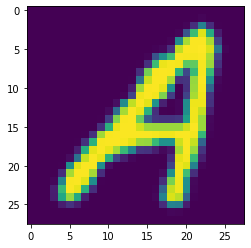

In [20]:
show_img(X_test[1])

In [21]:
a = 'a'
chr(ord(a) + 1)

'b'

In [22]:
rand_tensor = torch.rand(1,1,28,28,device='cuda')
model(rand_tensor).shape

/tmp/ipykernel_4477/1849687925.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


torch.Size([1, 26])

'f'

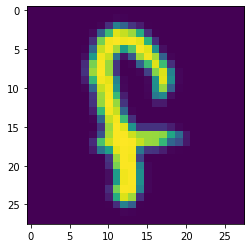

In [52]:
arr = X_test[4583]
show_img(arr)
test_tensor = (arr).to(device)
test_tensor = torch.unsqueeze(test_tensor, 0)
#test_tensor = torch.unsqueeze(test_tensor, 0)
letters = [chr(ord('a') + i) for i in range(26)]

letters[torch.argmax(model(test_tensor.unsqueeze(dim=0))).item()]

In [24]:
letters[torch.argmax(Y_test[10000]).item()]

'm'

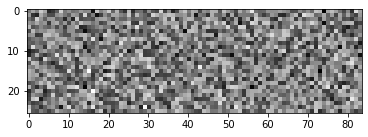

In [82]:
w = model.fc2.weight.data.cpu().numpy()
plt.imshow(w,cmap='gray')

/tmp/ipykernel_4477/1849687925.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


42
a


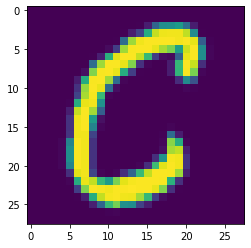

In [25]:
for i in range(42,m_test):
    arr = X_test[i]
    test_tensor = (arr).to(device)
    test_tensor = torch.unsqueeze(test_tensor, 0)
    pred = torch.argmax(model(test_tensor.unsqueeze(dim=0))).item() 
    truth = torch.argmax(Y_test[i]).item()
    if pred != truth:
        show_img(X[i])
        print(i)
        print(letters[truth])
        break



